Import fastai

In [2]:

from fastai.vision.all import *


In [3]:
# !pip install kornia

from kornia import rgb_to_grayscale
class RGB2GreyTransform(DisplayedTransform):
    order = 15 # run after IntToFloatTransform
    def encodes(self, o:TensorImage):
         # expand restores tensor shape back to use c channels 
         # (ie. N,c,h,w) instead of N,1,h,w
         c = o.shape[1]
         return rgb_to_grayscale(o).expand(-1,c,-1,-1)

In [5]:
path = '/imagenet/ILSVRC2012'
dls = ImageDataLoaders.from_folder(path, valid='val', 
    item_tfms=RandomResizedCrop(128, min_scale=0.35), batch_tfms=[Normalize.from_stats(*imagenet_stats),RGB2GreyTransform])
    

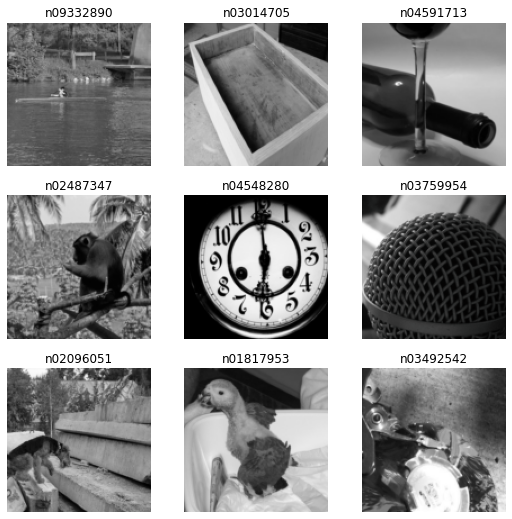

In [6]:
dls.show_batch()

In [7]:
def cornet_z_block(in_channels, out_channels, kernel_size=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size,
                  stride=stride, padding=kernel_size // 2),
        nn.ReLU(inplace=True), # TODO: Find out what this does
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1), # Magic Numbers!
        Identity()
    )

cornet_z = nn.Sequential(
    cornet_z_block(3, 64, kernel_size=7, stride=2),
    cornet_z_block(64, 128),
    cornet_z_block(128, 256),
    cornet_z_block(256, 512),
    nn.Sequential(
        nn.AdaptiveAvgPool2d(1),
        Flatten(),
        nn.Linear(512, 1000),
        Identity()
    )
)

In [8]:
learner = Learner(dls, cornet_z, metrics=accuracy)
learner.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9472       True      
ReLU                                                           
MaxPool2d                                                      
Identity                                                       
____________________________________________________________________________
                     64 x 128 x 32 x 32  
Conv2d                                    73856      True      
ReLU                                                           
MaxPool2d                                                      
Identity                                                       
____________________________________________________________________________
                     64 x 256 x 16 x 16  
Conv2d                                    295168     True      
ReLU                                               

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,4.897028,4.789739,0.133200,2:08:12
1,4.256623,4.189000,0.207680,2:07:52
2,3.874642,3.868024,0.249660,2:07:13
3,3.492539,3.530945,0.296340,2:07:28
4,3.267888,3.424234,0.316060,2:07:05


In [11]:
learner.save("cornet_z_imagenet_greyscale")

Path('/imagenet/ILSVRC2012/models/cornet_z_imagenet_greyscale.pth')

In [10]:
loaded = Learner(dls, cornet_z, metrics=accuracy)
loaded.load('cornet_z_imagenet_greyscale')
loaded.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9472       True      
ReLU                                                           
MaxPool2d                                                      
Identity                                                       
____________________________________________________________________________
                     64 x 128 x 32 x 32  
Conv2d                                    73856      True      
ReLU                                                           
MaxPool2d                                                      
Identity                                                       
____________________________________________________________________________
                     64 x 256 x 16 x 16  
Conv2d                                    295168     True      
ReLU                                               

In [ ]:
loaded.fit_one_cycle(10)
loaded.save("cornet_z_imagenet_greyscale")

epoch,train_loss,valid_loss,accuracy,time
0,4.329150,4.357013,0.191200,2:13:47
1,3.989932,4.074535,0.222020,2:07:03
2,4.090758,4.173812,0.207000,2:06:56
3,4.027541,3.968890,0.236760,2:06:52
4,3.803024,3.866858,0.252720,2:06:51
5,3.696000,3.766793,0.265080,2:06:57
6,3.475277,3.531378,0.296540,2:07:07
7,3.242235,3.370155,0.320080,2:07:12
8,3.163747,3.270447,0.336440,2:07:11


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [ ]:
loaded = Learner(dls, cornet_z, metrics=accuracy)
loaded.load('cornet_z_imagenet_greyscale')
loaded.validate()